In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
speed = [99, 96, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]
generatedArray = np.random.uniform(0.0, 5.0, 250) #250 value array of values between 0 and 5

print(np.percentile(ages, 75)) #prints 43 because 75% of the people/values are 43 or younger/lower
print(generatedArray)
print("generatedArray Median =", np.median(generatedArray))
print("generatedArray Mode=", stats.mode(generatedArray))
print(np.percentile(generatedArray, 60))

43.0
[1.39093583 1.85561157 0.63343948 0.78846817 3.80367588 2.20768166
 0.92663435 1.14389337 0.26113704 0.89478379 1.86714511 4.08136808
 3.95290085 4.10328017 1.91499702 1.58344699 3.70016334 4.99633936
 3.47138148 1.10747804 2.11371024 1.53582929 1.83336016 4.73890726
 4.6732061  2.80292062 1.2276759  3.21129734 3.49316493 2.0491773
 3.98382897 3.84801117 1.18885944 4.24261363 3.20485433 0.60530945
 0.44168369 1.51542743 3.32752099 3.61734311 0.9299045  2.99046142
 4.733494   3.72918211 2.2405324  2.87166689 0.5819867  3.99245308
 2.63681711 2.86772701 3.37063177 4.9234626  4.00245273 3.30712395
 4.84067525 4.61995216 4.39700474 0.20946586 2.01461415 3.9252103
 0.39818747 3.90397408 0.64691784 4.99656259 0.32736102 4.4806618
 3.22958574 3.9635935  0.62256613 2.98237934 2.37243992 4.55409925
 4.05988661 3.39778509 1.99437817 1.624839   2.8609626  1.75331615
 1.36426583 2.20569044 1.90292432 2.2077241  0.30784967 2.32880526
 0.81205012 1.88331733 3.43773527 2.8636508  2.73064551 4.28

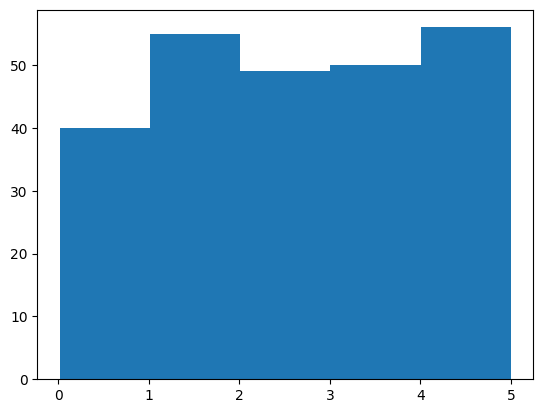

In [3]:
plt.hist(generatedArray, 5)
plt.show()

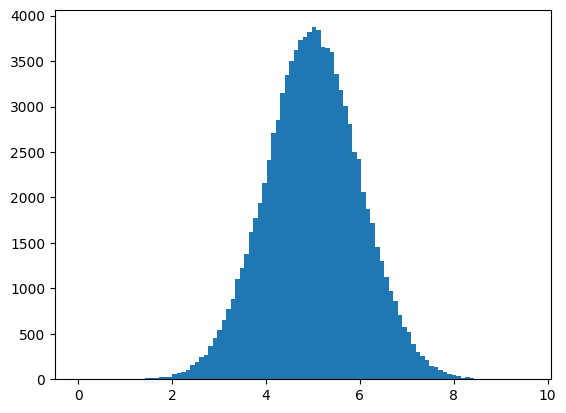

In [4]:
arr2 = np.random.normal(5.0, 1.0, 100000) #random array of 1000000 values centered around 5 with standard deviation 1
plt.hist(arr2, 100)
plt.show()

# Linear Regression

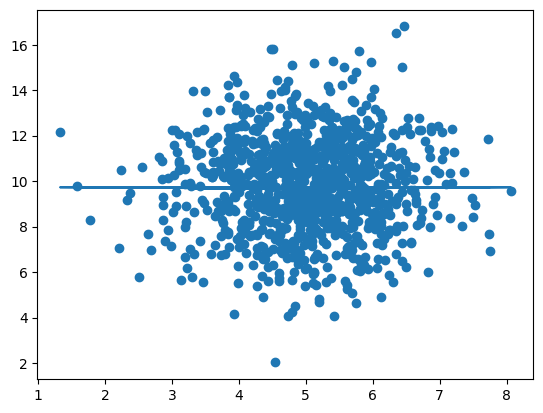

r = 0.012530906356069852


In [5]:
arr3 = np.random.normal(5.0, 1.0, 1000)
arr4 = np.random.normal(10.0, 2.0, 1000)


slope, intercept, r, p, std_err = stats.linregress(arr3, arr4) #the values of this line are fed by stats.linregress(arr3, arr4) and each have a separate value

def someFunc(arr3):
    return np.sin(arr3) * slope + intercept

simpleModel = list(map(someFunc, arr3))

plt.scatter(arr3, arr4)
plt.plot(arr3, simpleModel)
plt.show()

print("r =", r)

An obscenely low r or rsquared means dataset may not be a fit for the regression you're trying

In [6]:
# Using function to predict values

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed)

85.59308314937454


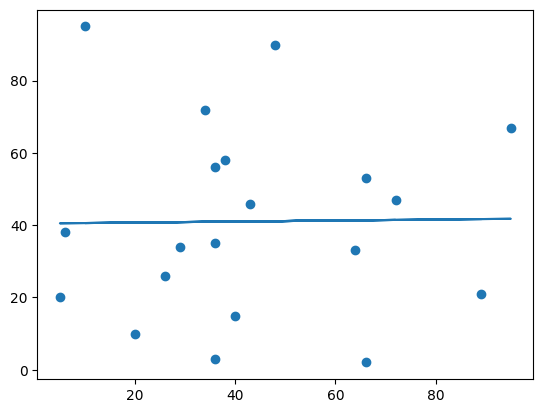

0.013318141542974908


In [7]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(r)

# Polynomial Regression

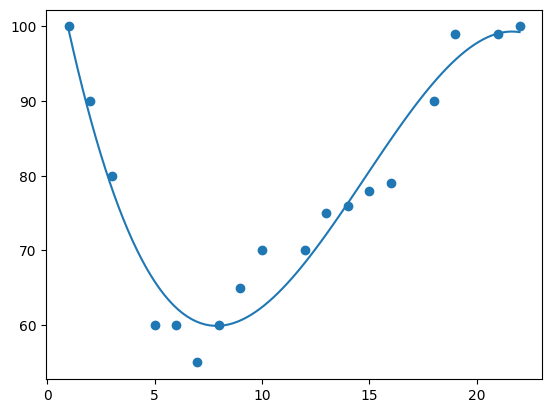

0.9432150416451025
88.87331269697988


In [8]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

polyModel = np.poly1d(np.polyfit(x, y, 3)) #method for creating polynomial model

polyLine = np.linspace(1, 22, 100) #specifies how the line will display, (start, end, something)

plt.scatter(x, y) #draw scatter plot
plt.plot(polyLine, polyModel(polyLine)) #plot line of polynomial regression onto drawn plot
plt.show()
print(r2_score(y, polyModel(x))) #like normal r but btwn 0 and 1 (1 being 100% related)
print(polyModel(17)) #predicted based on polynomial regression on original scatter plot

# Multiple Regression
Like linear regression, but more than one independent value, meaning two or more variables can be predicted

In [9]:
# we'll be using the data.csv I got from w3schools for this

dataFile = df = pandas.read_csv("data.csv")
X = df[['Weight', 'Volume']] #need two brackets because 2D array; this will be our independent variable
y = df['CO2'] #dependent variable

regr = linear_model.LinearRegression() #method to create linear regression object
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]]) #predicts C02 emission of a car where the weight is 2300 and the volume is 1300
print(predictedCO2)

print(regr.coef_) #coef_ is the relationship with an unknown variable, should print [coefficient value of weight against CO2, coef value of volume against CO2]

[114.75968007]
[0.00755095 0.00780526]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Scale
If things are in different units or proportions, and they create errors inside your model, you can scale everything to fit better

Standardization method: 
z = (x - u) / s    ;    z is the new value, x is the original value, u is the mean, and s is the standard deviation

In [10]:
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [11]:
scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Train/Test
The big boy stuff, finally

https://www.w3schools.com/python/python_ml_train_test.asp

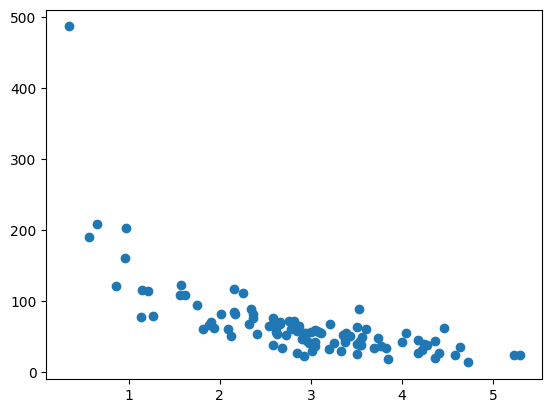

In [12]:
e = 2.71828

np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()



In [13]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

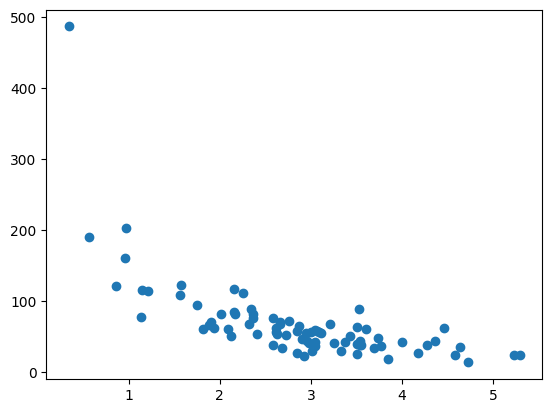

In [14]:
# Training Set
plt.scatter(train_x, train_y)
plt.show()

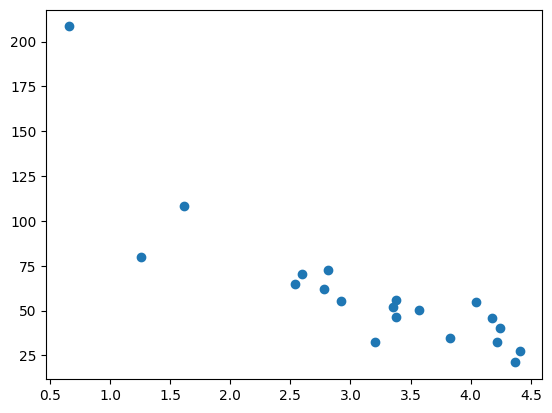

In [15]:
# Testing Set
plt.scatter(test_x, test_y)
plt.show()

r2 = 0.7988645544629798


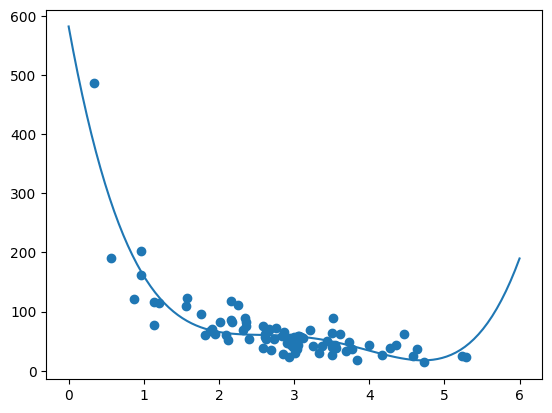

In [16]:
# Finding fit with polynomial regression

trainModel = np.poly1d(np.polyfit(train_x, train_y, 4)) # deg means degree of polynomial
trainLine = np.linspace(0, 6, 100)
r2 = r2_score(train_y, trainModel(train_x))

print("r2 =", r2)
plt.scatter(train_x, train_y)
plt.plot(trainLine, trainModel(trainLine))
plt.show()

In [17]:
# Model created, now test with test set

r2 = r2_score(test_y, trainModel(test_x))
print("Confidence\\Accuracy =", r2)

# Predicting values
print("Predicted value at 5:", trainModel(5))

Confidence\Accuracy = 0.8086921460343579
Predicted value at 5: 22.879625918117654


# Decision Trees
Helps make decisions based on previous experience

In [18]:
df = pandas.read_csv("data2.csv")
print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [19]:
# This is going to use pandas "map()" to map values that aren't numerical to 
# ones that are utilizing a dictionary of what to convert to what
dictionary = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(dictionary)
dictionary = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(dictionary)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [20]:
# We're going to have a feature and a target column, so we try to predict targets column based on feature column
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

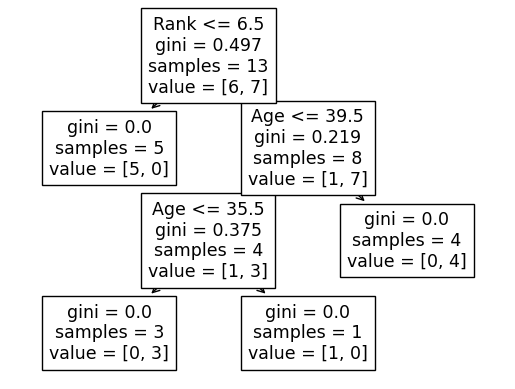

In [21]:
# Taking mapped data and creating the decision tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

### Regarding the above:
<ul>
<li>Rank has to do with the condition to go left(true) or right(false) down the tree</li>
<li>Gini (referring to the quality of the split)= 1 - (x/n)^2 - (y/n)^2
x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers<br>
("NO"), giving us the calculation:<br>
1 - (7/13)^2 - (6/13)^2 = 0.497</li>
<li>Samples is the number of people left at this point in the decision</li>
<li>Value is the split between true and false from the samples</li>
</ul>

In [22]:
# Testing prediction of model
# Format of arguments for predict method matches features, output will be value of 'Go'
print(dtree.predict([[40, 10, 7, 1]]))
print(dtree.predict([[40, 10, 6, 1]]))

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Confusion Matrix
Used in classification problems and helps assess where errors in the model were made

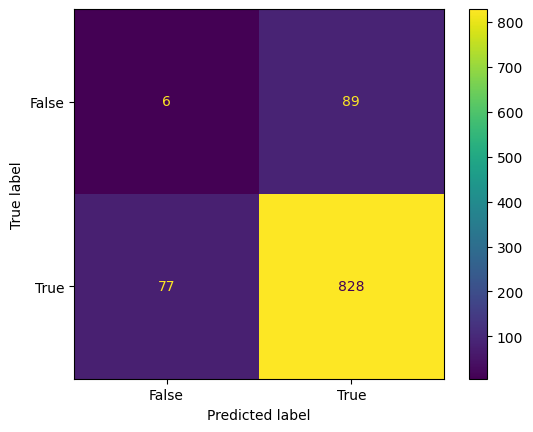

In [23]:
from sklearn import metrics # DON'T PUT THIS IN FIRST CELL OF NOTEBOOK

actual = np.random.binomial(1,0.9,size=1000)
predicted = np.random.binomial(1,0.9,size=1000)

conMatrix = metrics.confusion_matrix(actual, predicted) # will create confusion matrix based on actual and predicted
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conMatrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Results Explained
Confusion matrix has created the following quadrants:<br>
<ul>
<li>True Negative (Top-Left)</li>
<li>False Positive (Top-Right)</li>
<li>False Negative (Bottom-Left)</li>
<li>True Positive (Bottom-Right)</li>
</ul>

### Accuracy
Accuracy is measured for the model with the following equation: (TruePositive + TrueNegative) / Total Predictions

In [24]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.834


### Precision
What percentage was truly positive? <br>
True Positive / (True Positive + False Positive)<br>


In [25]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.9029443838604144


### Sensitivity (AKA Recall)
Of the positive cases, what percentage are predicted positive?<br>
Looks at true positive and false negatives, calculates True Positive / (True Positive + False Negative) <br>
Sensitivity is good for understanding how well the model predicts something is positive

In [26]:
Sensitivity_Recall = metrics.recall_score(actual, predicted)
print(Sensitivity_Recall)

0.9149171270718232


### Specificity
How well the model is at predicting negative results?<br>
True Negative / (True Negative + False Positive) <br>
Opposite of Recall<br>

In [27]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity)

0.06315789473684211


### F-score
Harmonic Mean of precision and sensitivity, considers both false positive and false negative cases and is good for imbalanced datasets.<br>
F-score = 2 * ((Precision * Sensitivity) / (Precision + Sensitivity)) <br>


In [28]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score)

0.9088913282107574


In [29]:
# Metrics shown all together
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_Recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.834, 'Precision': 0.9029443838604144, 'Sensitivity_recall': 0.9149171270718232, 'Specificity': 0.06315789473684211, 'F1_score': 0.9088913282107574}


# Hierarchical Clustering
Unsupervised learning method for clustering data points. Builds clusters by measuring the dissimilarities between data.<br>
Unsupervised means that it doesn't have to be "trained" and it doesn't need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.<br>


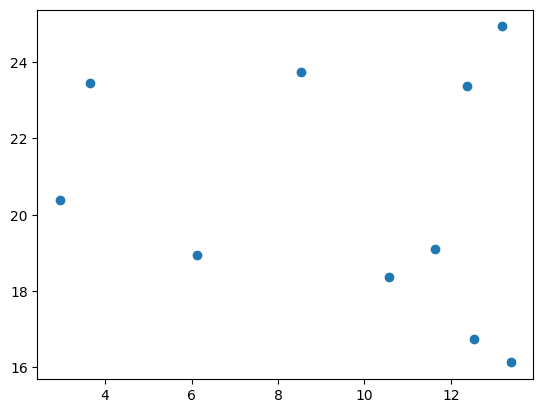

In [30]:
# Visualizing data points

x = np.random.uniform(1, 14, 10)
y = np.random.uniform(16, 25, 10)

plt.scatter(x,y)
plt.show()

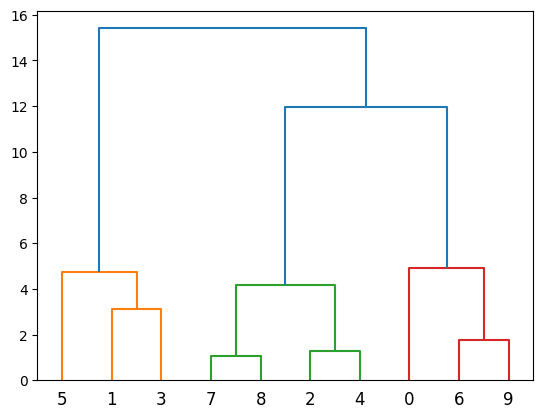

In [31]:
# Compute ward linkage using euclidean distance, and visualizing using a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

[(8.528327337302196, 23.732446146639496), (2.957455602880632, 20.396142853530456), (10.572393935106147, 18.358226418437074), (3.661865928108172, 23.45419368755474), (11.63298962180025, 19.100760485201395), (6.133892483747495, 18.9363235041201), (13.181891529930267, 24.92988759935385), (13.390962072418029, 16.13088368836628), (12.543944959111727, 16.73985216536), (12.380075038272192, 23.367697214023618)]


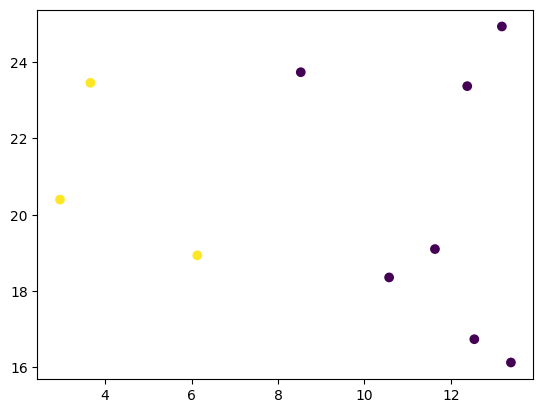

In [32]:
# same thing as above but python's scikit-learn library, sklearn; visualized on 2D plot
from sklearn.cluster import AgglomerativeClustering

data = list(zip(x, y))
print(data)

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

# Logistic Regression
Solves classification problems. It does this by predicting categorical outcomes, unlike linear regression that predits a continuous outcome. Think of an answer in the form of a category rather than a predicted number (species of flowers, malignant or benign tumors, etc.).<br>

In [33]:
from sklearn import linear_model
# X represents the size of a tumor in centimeters.
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

# Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [34]:
predicted = logr.predict(np.array([3.46]).reshape(-1,1))
print("3.46mm will not be cancerous:", predicted)
predicted = logr.predict(np.array([4.70]).reshape(-1,1))
print("4.70mm will be cancerous:", predicted)

3.46mm will not be cancerous: [0]
4.70mm will be cancerous: [1]


In [35]:
# In logistic regression, the coefficient is the expected change in log-odds of having the outcome per unit change in X.
log_odds = logr.coef_
odds = np.exp(log_odds)

print(odds)
# Essentially, this says that for every increase by 1mm increases its odds if being a tumor by 4x

[[4.03541657]]


In [36]:
def logit2prob(logr, X):
    log_odds = logr.coef_ * X + logr.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability
print(logit2prob(logr, X))
# Result should be array of probability that each measurement is cancerous from original data X

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


# Grid Search
Majority of models have parameters to adjust how the model learns. For example, logistic regression has C, controlling regularization. <br>
Grid Search is a method of finding the best value for this, trying out different values until the best score is found.<br>


In [37]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

In [38]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter = 10000) # create model
print(logit.fit(X,y)) # fit model to data
print(logit.score(X,y)) # evaluate model via score method

LogisticRegression(max_iter=10000)
0.9733333333333334


In [39]:
# Implementing Grid Search
C = [.25, .5, .75, 1, 1.25, 1.5, 1.75, 2]
scores = []
for choice in C:
    logit.set_params(C=choice)
    logit.fit(X,y)
    scores.append(logit.score(X,y))
print(scores)
# comparing everything, find the possible value which works better than the default value of 1

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


# PreProcessing - Categorical Data
Transform data that you want to use into data that you can use.

In [40]:
cars = pandas.read_csv('data.csv')
print(cars.to_string())

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

### One Hot Encoding
Data in data.csv isn't numerical so not usable, a linear relationship cannot be determined.<br>
To remedy this, we have a column representing each group in the category, having 1 or 0 representing inclusion in a group.<br>

In [41]:
ohe_cars = pandas.get_dummies(cars[['Car']]) # get_dummies() does one hot encoding for us

print(ohe_cars.to_string())

    Car_Audi  Car_BMW  Car_Fiat  Car_Ford  Car_Honda  Car_Hundai  Car_Hyundai  Car_Mazda  Car_Mercedes  Car_Mini  Car_Mitsubishi  Car_Opel  Car_Skoda  Car_Suzuki  Car_Toyoty  Car_VW  Car_Volvo
0      False    False     False     False      False       False        False      False         False     False           False     False      False       False        True   False      False
1      False    False     False     False      False       False        False      False         False     False            True     False      False       False       False   False      False
2      False    False     False     False      False       False        False      False         False     False           False     False       True       False       False   False      False
3      False    False      True     False      False       False        False      False         False     False           False     False      False       False       False   False      False
4      False    False     False    

In [ ]:
# Combining information with concat then predicting additional information alongside volume and weight to predict CO2
X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']